In [3]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore') 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# ---------------- Classics ------------ #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------- Deep Learning libs --------- #
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

## MNIST Handwriting Image recognition aka Iris dataset

In [5]:
mnist = tf.keras.datasets.mnist # 28 x 28 images of hand-written digits 0-9

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

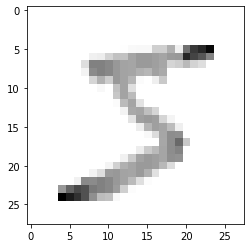

In [7]:
plt.imshow(X_train[0], cmap=plt.cm.binary);

In [8]:
model = Sequential()

# Pre-processing 28x28 image to 784 size
model.add(Flatten())
# Input -> Hidden
model.add(Dense(128, activation='relu'))
# 1st Hidden Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, verbose=True)

W1010 01:05:03.405332 139938847672128 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/3
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2653 - acc: 0.9233
Epoch 2/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1071 - acc: 0.9671
Epoch 3/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0734 - acc: 0.9771


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [10]:
scores = model.evaluate(X_test, y_test, verbose=False)
for i, score in enumerate(scores):
    print(f"{model.metrics_names[i]}: {score*100}")

loss: 9.516328476984054
acc: 97.02000021934509


In [11]:
model.save('lame_mnist.model')

In [12]:
new_model = tf.keras.models.load_model('lame_mnist.model')
predictions = new_model.predict(X_test)

W1010 01:05:17.070454 139938847672128 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1010 01:05:17.071799 139938847672128 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1010 01:05:17.200700 139938847672128 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initiali

In [13]:
np.argmax(predictions[0])

7

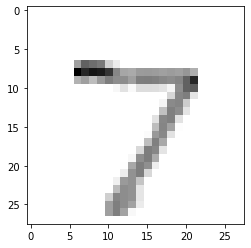

In [14]:
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()

## Cats and Dog

In [15]:
!rm -rf /storage/kagglecatsanddogs_3367a.zip
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip -P /storage
!unzip -qo /storage/kagglecatsanddogs_3367a.zip -d /storage
!rm -rf /storage/kagglecatsanddogs_3367a.zip

--2019-10-10 01:05:18--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.27.36.156, 2600:1406:d000:19e::e59, 2600:1406:d000:1b9::e59
Connecting to download.microsoft.com (download.microsoft.com)|184.27.36.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/storage/kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M  73.1MB/s    in 11s     

2019-10-10 01:05:33 (73.2 MB/s) - ‘/storage/kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



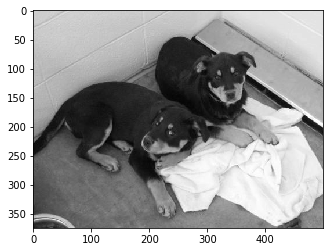

In [16]:
import os
import cv2

DATADIR = '/storage/PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

In [17]:
print(img_array.shape)

(375, 500)


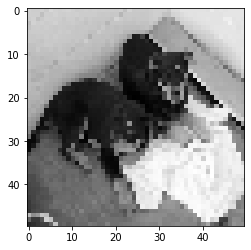

In [22]:
IMG_SIZE = 50

new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_img_array, cmap = 'gray')
plt.show()

In [23]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_img_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [24]:
print(len(training_data))

24946


In [25]:
import random
random.seed(42)
random.shuffle(training_data)

In [26]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
1
1
1
0


In [28]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
X.shape, y.shape

((24946, 50, 50, 1), (24946,))

In [29]:
# import pickle

# pickle_out = open("X.pickle", "wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle", "wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

# pickle_in = open("X.pickle", "rb")
# X_pkl = pickle.load(pickle_in)
# pickle_in.close()

# pickle_in = open("y.pickle", "rb")
# y_pkl = pickle.load(pickle_in)
# pickle_in.close()

# X_pkl.shape, y_pkl.shape

((24946, 50, 50, 1), (24946,))